In [1]:
import csv
import os
import pandas as pd

In [2]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [3]:
df.head(5)

,OBJECTID,GEOID10,NAME10,PLNG_REGION,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,...,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,GlobalID
0,1,13045910103,9101.03,ARC 20,0,0,0,0,0,1,...,0.830444,832.244207,0.165786,1212.092423,0.812939,388.429152,0.868969,30.598599,0.017656,{5550A054-FDCE-4733-8B0C-A1947228CE5D}
1,2,13045910104,9101.04,ARC 20,0,0,0,0,1,0,...,0.908498,2714.580415,0.292740,2531.804935,0.935281,613.913957,0.769316,105.395259,0.033133,{C6FF347E-7A0E-49CC-95F8-6442CAB49326}
2,3,13045910502,9105.02,ARC 20,1,1,1,1,1,0,...,0.677910,1634.143695,0.559638,394.285953,0.595598,108.874610,0.513559,141.638535,0.141497,{59E4487C-A509-45FF-95E5-D3C0BBE650BB}
3,4,13045910800,9108.00,ARC 20,0,0,0,0,0,1,...,1.000000,1557.335152,0.391881,958.000006,1.000000,491.000002,1.000000,41.470898,0.028405,{B14B7E5F-B673-439E-9C6E-638AD0B38A33}
4,5,13045910101,9101.01,ARC 20,1,1,1,1,1,0,...,0.247035,738.495538,0.124557,400.600253,0.237182,153.517815,0.282722,61.471188,0.027176,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806}


In [4]:
print(df.columns)

Index(['OBJECTID', 'GEOID10', 'NAME10', 'PLNG_REGION', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'Urban', 'Rural', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'HUNVFlag',
       'GroupQuartersFlag', 'OHU2010', 'NUMGQTRS', 'PCTGQTRS',
       'LowIncomeTracts', 'POP2010', 'UATYP10', 'lapophalf', 'lapophalfshare',
       'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare',
       'laseniorshalf', 'laseniorshalfshare', 'lahunvhalf', 'lahunvhalfshare',
       'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1',
       'lakids1share', 'laseniors1', 'laseniors1share', 'lahunv1',
       'lahunv1share', 'GlobalID'],
      dtype='object')


In [5]:
# Create three DF's to store different columns
kids_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","lakidshalf","lakidshalfshare","lakids1","lakids1share","GlobalID","lalowi1","lalowi1share","lapop1","lapop1share"}]
kids_df


,Urban,lalowi1share,lapop1,lapop1share,lakids1,GlobalID,lakidshalf,lakids1share,NAME10,PLNG_REGION,lalowi1,lakidshalfshare,GEOID10
0,0,0.165786,4168.828564,0.830444,1212.092423,{5550A054-FDCE-4733-8B0C-A1947228CE5D},1330.181374,0.812939,9101.03,ARC 20,832.244207,0.892140,13045910103
1,1,0.292740,8424.506346,0.908498,2531.804935,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},2623.877557,0.935281,9101.04,ARC 20,2714.580415,0.969294,13045910104
2,1,0.559638,1979.496369,0.677910,394.285953,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},657.226749,0.595598,9105.02,ARC 20,1634.143695,0.992790,13045910502
3,0,0.391881,3974.000026,1.000000,958.000006,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},958.000006,1.000000,9108.00,ARC 20,1557.335152,1.000000,13045910800
4,1,0.124557,1464.668253,0.247035,400.600253,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},1256.990076,0.237182,9101.01,ARC 20,738.495538,0.744221,13045910101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1,0.114799,7620.260307,0.676094,2519.536417,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},3428.134246,0.684471,1201.02,ARC 20,1293.902235,0.931305,13223120102
944,0,0.139289,6703.747686,0.782508,2118.691044,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},2550.102779,0.762668,1201.03,ARC 20,1193.293010,0.917964,13223120103
945,1,0.173631,5505.013546,0.462762,1449.743154,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},2917.327602,0.440785,1203.02,ARC 20,2065.519935,0.886995,13223120302
946,1,0.228289,5005.805781,0.699428,1518.259609,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},1910.915240,0.737735,1202.02,ARC 20,1633.867000,0.928530,13223120202


In [6]:
# Low income vs non low income

low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1"}]
low_income_df

,Urban,lalowi1share,lapop1,GlobalID,lalowihalfshare,NAME10,PLNG_REGION,lalowi1,LowIncomeTracts,lalowihalf,GEOID10
0,0,0.165786,4168.828564,{5550A054-FDCE-4733-8B0C-A1947228CE5D},0.184989,9101.03,ARC 20,832.244207,0,928.643255,13045910103
1,1,0.292740,8424.506346,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},0.309831,9101.04,ARC 20,2714.580415,0,2873.063683,13045910104
2,1,0.559638,1979.496369,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},0.817848,9105.02,ARC 20,1634.143695,1,2388.115731,13045910502
3,0,0.391881,3974.000026,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},0.391881,9108.00,ARC 20,1557.335152,1,1557.335152,13045910800
4,1,0.124557,1464.668253,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},0.365078,9101.01,ARC 20,738.495538,1,2164.547997,13045910101
...,...,...,...,...,...,...,...,...,...,...,...
943,1,0.114799,7620.260307,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},0.160460,1201.02,ARC 20,1293.902235,0,1808.542071,13223120102
944,0,0.139289,6703.747686,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},0.160347,1201.03,ARC 20,1193.293010,0,1373.688844,13223120103
945,1,0.173631,5505.013546,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},0.352241,1203.02,ARC 20,2065.519935,0,4190.258936,13223120302
946,1,0.228289,5005.805781,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},0.314849,1202.02,ARC 20,1633.867000,0,2253.373996,13223120202


In [7]:
stores_df = df[{"NAME10","Urban","PLNG_REGION","LILATracts_1And10","LILATracts_halfAnd10","LA1and10","LAhalfand10","LA1and20","LATracts_half","LATracts1","LATracts10","LATracts20","LowIncomeTracts","POP2010","lapophalf","lapophalfshare","lalowihalf","lalowihalfshare","lapop1","lapop1share","lalowi1","lalowi1share","OHU2010", "lahunv1"}]
stores_df

,NAME10,lalowi1,lalowihalf,LILATracts_1And10,LILATracts_halfAnd10,lahunv1,LATracts10,OHU2010,lapop1,lapop1share,...,LA1and10,LowIncomeTracts,Urban,lalowi1share,lapophalf,POP2010,lalowihalfshare,PLNG_REGION,LA1and20,LATracts20
0,9101.03,832.244207,928.643255,0,0,30.598599,0,1733,4168.828564,0.830444,...,0,0,0,0.165786,4560.050754,5020,0.184989,ARC 20,0,0
1,9101.04,2714.580415,2873.063683,0,0,105.395259,0,3181,8424.506346,0.908498,...,1,0,1,0.292740,8923.358003,9273,0.309831,ARC 20,1,0
2,9105.02,1634.143695,2388.115731,1,1,141.638535,0,1001,1979.496369,0.677910,...,1,1,1,0.559638,2903.442168,2920,0.817848,ARC 20,1,0
3,9108.00,1557.335152,1557.335152,0,0,41.470898,0,1460,3974.000026,1.000000,...,0,1,0,0.391881,3974.000026,3974,0.391881,ARC 20,0,0
4,9101.01,738.495538,2164.547997,1,1,61.471188,0,2262,1464.668253,0.247035,...,1,1,1,0.124557,4519.483605,5929,0.365078,ARC 20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1201.02,1293.902235,1808.542071,0,0,23.289431,0,3477,7620.260307,0.676094,...,1,0,1,0.114799,10475.236037,11271,0.160460,ARC 20,1,0
944,1201.03,1193.293010,1373.688844,0,0,0.000000,0,2769,6703.747686,0.782508,...,0,0,0,0.139289,7914.940175,8567,0.160347,ARC 20,0,0
945,1203.02,2065.519935,4190.258936,0,0,97.613907,0,4503,5505.013546,0.462762,...,1,0,1,0.173631,10591.961287,11896,0.352241,ARC 20,1,0
946,1202.02,1633.867000,2253.373996,0,0,54.220317,0,2512,5005.805781,0.699428,...,1,0,1,0.228289,6553.704673,7157,0.314849,ARC 20,1,0


In [8]:
stores_df = stores_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                      "GlobalID": "Global_ID",
                                      "LowIncomeTracts": "Income_Level", 
                                      "lalowihalf": "LowAcces_LowIncome05miles", 
                                      "lalowi1share": "LowAccess_LowIncome1milePRCT", 
                                      "lalowihalfshare": "LowAccess_LowIncome05milesPRCT", 
                                      "lalowi1": "LowAccess_LowIncome1mile", 
                                      "GEOID10": "Geo_ID", 
                                      "NAME10": "Name", 
                                      "lahunv1": "NoCar LowAccess1mile"})
stores_df["NoCar LowAccess1mile"]

0       30.598599
1      105.395259
2      141.638535
3       41.470898
4       61.471188
          ...    
943     23.289431
944      0.000000
945     97.613907
946     54.220317
947     63.348930
Name: NoCar LowAccess1mile, Length: 948, dtype: float64

In [9]:
urban_stores = stores_df.loc[(stores_df["Urban"]==1) & (stores_df["Metro_Atlanta"] == "ARC 10")]


In [10]:
urban_stores

,Name,LowAccess_LowIncome1mile,LowAcces_LowIncome05miles,LILATracts_1And10,LILATracts_halfAnd10,NoCar LowAccess1mile,LATracts10,OHU2010,lapop1,lapop1share,...,LA1and10,Income_Level,Urban,LowAccess_LowIncome1milePRCT,lapophalf,POP2010,LowAccess_LowIncome05milesPRCT,Metro_Atlanta,LA1and20,LATracts20
17,1402.07,81.874532,138.037981,0,0,8.782476,0,2208,3105.415489,0.561558,...,1,0,1,0.014806,4737.417269,5530,0.024962,ARC 10,1,0
18,1402.08,528.048979,1006.024462,0,0,11.681039,0,2749,3251.804581,0.421600,...,1,0,1,0.068462,6536.637064,7713,0.130432,ARC 10,1,0
19,1403.03,259.816848,526.739981,0,0,20.318478,0,1702,1900.698065,0.417736,...,1,0,1,0.057103,3984.209043,4550,0.115767,ARC 10,1,0
20,1403.04,663.866800,912.247186,0,0,9.131079,0,2231,3217.267229,0.558844,...,1,0,1,0.115315,4915.826453,5757,0.158459,ARC 10,1,0
22,1404.08,411.910983,411.910983,0,0,10.499310,0,1095,3238.999945,1.000000,...,1,0,1,0.127172,3238.999945,3239,0.127172,ARC 10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,909.01,960.080472,1124.195803,0,0,35.743917,0,2489,6260.021520,0.879340,...,1,0,1,0.134862,7076.423269,7119,0.157915,ARC 10,1,0
905,906.02,525.380600,2018.364617,0,0,16.967492,0,2742,1913.503440,0.228451,...,1,0,1,0.062725,6209.508730,8376,0.240970,ARC 10,1,0
907,907.02,1082.336118,1287.420219,0,0,20.991483,0,2597,5667.255401,0.789311,...,1,0,1,0.150743,6918.774120,7180,0.179306,ARC 10,1,0
908,905.02,1303.824461,1422.106088,0,0,21.956449,0,4147,10627.521802,0.880856,...,1,0,1,0.108067,11821.714195,12065,0.117870,ARC 10,1,0


In [11]:
urban_stores.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
urban_stores

C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Name,LowAccess_LowIncome1mile,LowAcces_LowIncome05miles,LILATracts_1And10,LILATracts_halfAnd10,NoCar LowAccess1mile,LATracts10,OHU2010,lapop1,lapop1share,...,LA1and10,Income_Level,Urban,LowAccess_LowIncome1milePRCT,lapophalf,POP2010,LowAccess_LowIncome05milesPRCT,Metro_Atlanta,LA1and20,LATracts20
17,1402.07,81.874532,138.037981,0,0,8.782476,0,2208,3105.415489,0.561558,...,1,Not Low Income,1,0.014806,4737.417269,5530,0.024962,ARC 10,1,0
18,1402.08,528.048979,1006.024462,0,0,11.681039,0,2749,3251.804581,0.421600,...,1,Not Low Income,1,0.068462,6536.637064,7713,0.130432,ARC 10,1,0
19,1403.03,259.816848,526.739981,0,0,20.318478,0,1702,1900.698065,0.417736,...,1,Not Low Income,1,0.057103,3984.209043,4550,0.115767,ARC 10,1,0
20,1403.04,663.866800,912.247186,0,0,9.131079,0,2231,3217.267229,0.558844,...,1,Not Low Income,1,0.115315,4915.826453,5757,0.158459,ARC 10,1,0
22,1404.08,411.910983,411.910983,0,0,10.499310,0,1095,3238.999945,1.000000,...,1,Not Low Income,1,0.127172,3238.999945,3239,0.127172,ARC 10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,909.01,960.080472,1124.195803,0,0,35.743917,0,2489,6260.021520,0.879340,...,1,Not Low Income,1,0.134862,7076.423269,7119,0.157915,ARC 10,1,0
905,906.02,525.380600,2018.364617,0,0,16.967492,0,2742,1913.503440,0.228451,...,1,Not Low Income,1,0.062725,6209.508730,8376,0.240970,ARC 10,1,0
907,907.02,1082.336118,1287.420219,0,0,20.991483,0,2597,5667.255401,0.789311,...,1,Not Low Income,1,0.150743,6918.774120,7180,0.179306,ARC 10,1,0
908,905.02,1303.824461,1422.106088,0,0,21.956449,0,4147,10627.521802,0.880856,...,1,Not Low Income,1,0.108067,11821.714195,12065,0.117870,ARC 10,1,0


In [12]:
YesCar = urban_stores["OHU2010"]-urban_stores["NoCar LowAccess1mile"]

In [13]:
urban_stores.loc[:,"YesCar"] = YesCar

C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mehdi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
urban_stores["YesCar"]

17     2199.217524
18     2737.318961
19     1681.681522
20     2221.868921
22     1084.500690
          ...     
904    2453.256083
905    2725.032508
907    2576.008517
908    4125.043551
910    3768.908363
Name: YesCar, Length: 710, dtype: float64

In [15]:
urban_stores=urban_stores.reset_index()

In [17]:
urban_stores=urban_stores.drop(columns = "index")

In [18]:
urban_stores

,Name,LowAccess_LowIncome1mile,LowAcces_LowIncome05miles,LILATracts_1And10,LILATracts_halfAnd10,NoCar LowAccess1mile,LATracts10,OHU2010,lapop1,lapop1share,...,Income_Level,Urban,LowAccess_LowIncome1milePRCT,lapophalf,POP2010,LowAccess_LowIncome05milesPRCT,Metro_Atlanta,LA1and20,LATracts20,YesCar
0,1402.07,81.874532,138.037981,0,0,8.782476,0,2208,3105.415489,0.561558,...,Not Low Income,1,0.014806,4737.417269,5530,0.024962,ARC 10,1,0,2199.217524
1,1402.08,528.048979,1006.024462,0,0,11.681039,0,2749,3251.804581,0.421600,...,Not Low Income,1,0.068462,6536.637064,7713,0.130432,ARC 10,1,0,2737.318961
2,1403.03,259.816848,526.739981,0,0,20.318478,0,1702,1900.698065,0.417736,...,Not Low Income,1,0.057103,3984.209043,4550,0.115767,ARC 10,1,0,1681.681522
3,1403.04,663.866800,912.247186,0,0,9.131079,0,2231,3217.267229,0.558844,...,Not Low Income,1,0.115315,4915.826453,5757,0.158459,ARC 10,1,0,2221.868921
4,1404.08,411.910983,411.910983,0,0,10.499310,0,1095,3238.999945,1.000000,...,Not Low Income,1,0.127172,3238.999945,3239,0.127172,ARC 10,1,0,1084.500690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,909.01,960.080472,1124.195803,0,0,35.743917,0,2489,6260.021520,0.879340,...,Not Low Income,1,0.134862,7076.423269,7119,0.157915,ARC 10,1,0,2453.256083
706,906.02,525.380600,2018.364617,0,0,16.967492,0,2742,1913.503440,0.228451,...,Not Low Income,1,0.062725,6209.508730,8376,0.240970,ARC 10,1,0,2725.032508
707,907.02,1082.336118,1287.420219,0,0,20.991483,0,2597,5667.255401,0.789311,...,Not Low Income,1,0.150743,6918.774120,7180,0.179306,ARC 10,1,0,2576.008517
708,905.02,1303.824461,1422.106088,0,0,21.956449,0,4147,10627.521802,0.880856,...,Not Low Income,1,0.108067,11821.714195,12065,0.117870,ARC 10,1,0,4125.043551


In [27]:
cars = urban_stores["YesCar"].sum()
no_cars = urban_stores["NoCar LowAccess1mile"].sum()
print(cars)

1436929.09271367


In [28]:
print(no_cars)

22226.90728633


In [31]:
cars_dicts=[{"cars": cars, "no_cars": no_cars}]
cars_dicts

[{'cars': 1436929.09271367, 'no_cars': 22226.90728633}]

In [32]:
cars_df = pd.DataFrame(cars_dicts)
cars_df

,cars,no_cars
0,1.436929e+06,22226.907286


In [26]:
urban_stores[["YesCar", "NoCar LowAccess1mile", "OHU2010"]]

,YesCar,NoCar LowAccess1mile,OHU2010
0,2199.217524,8.782476,2208
1,2737.318961,11.681039,2749
2,1681.681522,20.318478,1702
3,2221.868921,9.131079,2231
4,1084.500690,10.499310,1095
...,...,...,...
705,2453.256083,35.743917,2489
706,2725.032508,16.967492,2742
707,2576.008517,20.991483,2597
708,4125.043551,21.956449,4147


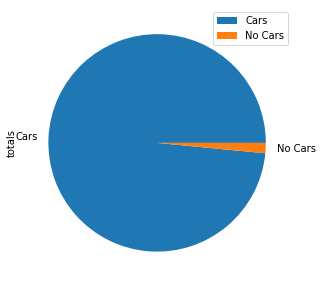

In [39]:
df = pd.DataFrame({"totals": [cars,no_cars],},
                 index =['Cars','No Cars'])

plot = df.plot.pie(y='totals', figsize=(5,5)) 